In [1]:
# Importar las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from funpymodeling.exploratory import freq_tbl
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
# Leer la base de la cdmx limpia
df= pd.read_csv("Paciente08.csv")
df.drop("Unnamed: 0", axis = 1, inplace = True)
df.head(6)

,TimeWindow,User,01_C,02_A,03_D,04_M,Veloc,Acele,Des_x,Des_y,...,F17MS,F18MX,F15MS,F16MX,F19MH,F20MH,F1EBX,F2EBS,F4EBX,F3EBS
0,v3,p08,-1,1,-1,-1,0.4,0.3,0.4,0.4,...,0.7,0.6,0.8,0.7,0.7,0.600000,0.7,0.7,0.6,0.6
1,v3,p08,-1,1,-1,-1,0.4,0.3,0.4,0.4,...,0.7,0.6,0.8,0.7,0.7,0.600000,0.7,0.7,0.6,0.6
2,v3,p08,-1,1,-1,-1,0.4,0.3,0.4,0.4,...,0.7,0.6,0.8,0.7,0.7,0.600000,0.7,0.7,0.6,0.6
3,v3,p08,-1,1,-1,-1,0.4,0.3,0.4,0.4,...,0.7,0.6,0.8,0.7,0.7,0.600000,0.7,0.7,0.6,0.6
4,v3,p08,-1,1,-1,-1,0.4,0.3,0.4,0.4,...,0.7,0.6,0.8,0.7,0.7,0.600766,0.7,0.7,0.6,0.6
5,v3,p08,-1,1,-1,-1,0.4,0.3,0.4,0.4,...,0.7,0.6,0.8,0.7,0.7,0.600000,0.7,0.7,0.6,0.6


In [3]:
# Seleccionar solo ansiedad:
dfansiedad = df.drop(["01_C", "03_D", "04_M"], axis = 1)
dfansiedad

dfansiedad = dfansiedad[dfansiedad["02_A"] == 1]
dfansiedad

,TimeWindow,User,02_A,Veloc,Acele,Des_x,Des_y,Des_z,Presn,VelPr,...,F17MS,F18MX,F15MS,F16MX,F19MH,F20MH,F1EBX,F2EBS,F4EBX,F3EBS
0,v3,p08,1,0.4,0.3,0.4,0.4,0.2,0.7,0.400000,...,0.7,0.600000,0.8,0.700000,0.7,0.600000,0.7,0.7,0.600000,0.6
1,v3,p08,1,0.4,0.3,0.4,0.4,0.2,0.7,0.400000,...,0.7,0.600000,0.8,0.700000,0.7,0.600000,0.7,0.7,0.600000,0.6
2,v3,p08,1,0.4,0.3,0.4,0.4,0.2,0.7,0.400000,...,0.7,0.600000,0.8,0.700000,0.7,0.600000,0.7,0.7,0.600000,0.6
3,v3,p08,1,0.4,0.3,0.4,0.4,0.2,0.7,0.400000,...,0.7,0.600000,0.8,0.700000,0.7,0.600000,0.7,0.7,0.600000,0.6
4,v3,p08,1,0.4,0.3,0.4,0.4,0.2,0.7,0.400000,...,0.7,0.600000,0.8,0.700000,0.7,0.600766,0.7,0.7,0.600000,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24553,v11,p08,1,0.4,0.3,0.4,0.4,0.2,0.7,0.414256,...,0.7,0.681298,0.8,0.744184,0.7,0.656218,0.7,0.7,0.600000,0.6
24554,v11,p08,1,0.4,0.3,0.4,0.4,0.2,0.7,0.433150,...,0.7,0.676681,0.8,0.742666,0.7,0.649958,0.7,0.7,0.600000,0.6
24555,v11,p08,1,0.4,0.3,0.4,0.4,0.2,0.7,0.400000,...,0.7,0.672784,0.8,0.741207,0.7,0.657068,0.7,0.7,0.585302,0.6
24556,v11,p08,1,0.4,0.3,0.4,0.4,0.2,0.7,0.400000,...,0.7,0.681610,0.8,0.752483,0.7,0.657872,0.7,0.7,0.590790,0.6


In [4]:
dfansiedad[['F5EEX', 'F6EES', 'F8EIX', 'F7EIS',
       'F9EEX', 'F10ES', 'F11EX', 'F12ES', 'F13EV', 'F14EV', 'F17MS', 'F18MX',
       'F15MS', 'F16MX', 'F19MH', 'F20MH', 'F1EBX', 'F2EBS', 'F4EBX', 'F3EBS']]

,F5EEX,F6EES,F8EIX,F7EIS,F9EEX,F10ES,F11EX,F12ES,F13EV,F14EV,F17MS,F18MX,F15MS,F16MX,F19MH,F20MH,F1EBX,F2EBS,F4EBX,F3EBS
0,0.6,0.5,0.6,0.6,0.6,0.6,0.6,0.7,0.8,0.8,0.7,0.600000,0.8,0.700000,0.7,0.600000,0.7,0.7,0.600000,0.6
1,0.6,0.5,0.6,0.6,0.6,0.6,0.6,0.7,0.8,0.8,0.7,0.600000,0.8,0.700000,0.7,0.600000,0.7,0.7,0.600000,0.6
2,0.6,0.5,0.6,0.6,0.6,0.6,0.6,0.7,0.8,0.8,0.7,0.600000,0.8,0.700000,0.7,0.600000,0.7,0.7,0.600000,0.6
3,0.6,0.5,0.6,0.6,0.6,0.6,0.6,0.7,0.8,0.8,0.7,0.600000,0.8,0.700000,0.7,0.600000,0.7,0.7,0.600000,0.6
4,0.6,0.5,0.6,0.6,0.6,0.6,0.6,0.7,0.8,0.8,0.7,0.600000,0.8,0.700000,0.7,0.600766,0.7,0.7,0.600000,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24553,0.6,0.5,0.6,0.6,0.6,0.6,0.6,0.7,0.8,0.8,0.7,0.681298,0.8,0.744184,0.7,0.656218,0.7,0.7,0.600000,0.6
24554,0.6,0.5,0.6,0.6,0.6,0.6,0.6,0.7,0.8,0.8,0.7,0.676681,0.8,0.742666,0.7,0.649958,0.7,0.7,0.600000,0.6
24555,0.6,0.5,0.6,0.6,0.6,0.6,0.6,0.7,0.8,0.8,0.7,0.672784,0.8,0.741207,0.7,0.657068,0.7,0.7,0.585302,0.6
24556,0.6,0.5,0.6,0.6,0.6,0.6,0.6,0.7,0.8,0.8,0.7,0.681610,0.8,0.752483,0.7,0.657872,0.7,0.7,0.590790,0.6


In [5]:
# Ciclo para obtener mínimos y máximos por cejas, ojos, boca

puntosFaciales = ['F5EEX', 'F6EES', 'F8EIX', 'F7EIS',
       'F9EEX', 'F10ES', 'F11EX', 'F12ES', 'F13EV', 'F14EV', 'F17MS', 'F18MX',
       'F15MS', 'F16MX', 'F19MH', 'F20MH', 'F1EBX', 'F2EBS', 'F4EBX', 'F3EBS']

RangoMinimo = []
RangoMaximo = []
RangoMinCejas = []
RangoMaxCejas = []
RangoMinOjos = []
RangoMaxOjos = []
RangoMinBoca = []
RangoMaxBoca = []

for x in puntosFaciales:
    min_val = dfansiedad[x].min()
    print(f"Mínimo de {x}: {min_val}")
    RangoMinimo.append(min_val)
    
    max_val = dfansiedad[x].max()
    print(f"Máximo de {x}: {max_val} \n")
    RangoMaximo.append(max_val)
    
    # Verificar y guardar en listas específicas si cumple la condición
    if x in ['F1EBX', 'F2EBS', 'F3EBS', 'F4EBX']:
        RangoMinCejas.append(min_val)
        RangoMaxCejas.append(max_val)
    
    if x in ['F5EEX', 'F6EES', 'F8EIX', 'F7EIS', 'F9EEX', 'F10ES', 'F11EX', 'F12ES', 'F13EV', 'F14EV']:
        RangoMinOjos.append(min_val)
        RangoMaxOjos.append(max_val)
    
    if x in ['F15MS', 'F16MX', 'F19MH', 'F20MH', 'F17MS', 'F18MX']:
        RangoMinBoca.append(min_val)
        RangoMaxBoca.append(max_val)

RangoMinimo = pd.Series(RangoMinimo)
RangoMaximo = pd.Series(RangoMaximo)
RangoMinCejas = pd.Series(RangoMinCejas)
RangoMaxCejas = pd.Series(RangoMaxCejas)
RangoMinOjos = pd.Series(RangoMinOjos)
RangoMaxOjos = pd.Series(RangoMaxOjos)
RangoMinBoca = pd.Series(RangoMinBoca)
RangoMaxBoca = pd.Series(RangoMaxBoca)

print(f"El valor mínimo global fue de: {RangoMinimo.min()}")
print(f"El valor máximo global fue de: {RangoMaximo.max()}")
print(f"El valor mínimo en cejas fue de: {RangoMinCejas.min()}")
print(f"El valor máximo en cejas fue de: {RangoMaxCejas.max()}")
print(f"El valor mínimo en ojos fue de: {RangoMinOjos.min()}")
print(f"El valor máximo en ojos fue de: {RangoMaxOjos.max()}")
print(f"El valor mínimo en boca fue de: {RangoMinBoca.min()}")
print(f"El valor máximo en boca fue de: {RangoMaxBoca.max()}")

Mínimo de F5EEX: 0.54620699
Máximo de F5EEX: 0.68727862 

Mínimo de F6EES: 0.49142999
Máximo de F6EES: 0.61246469 

Mínimo de F8EIX: 0.55098179
Máximo de F8EIX: 0.6903409 

Mínimo de F7EIS: 0.57083063
Máximo de F7EIS: 0.72689768 

Mínimo de F9EEX: 0.59886447
Máximo de F9EEX: 0.74306731 

Mínimo de F10ES: 0.53286188
Máximo de F10ES: 0.64936761 

Mínimo de F11EX: 0.51963854
Máximo de F11EX: 0.63428489 

Mínimo de F12ES: 0.62564222
Máximo de F12ES: 0.77337631 

Mínimo de F13EV: 0.71328367
Máximo de F13EV: 0.8394453 

Mínimo de F14EV: 0.7028337
Máximo de F14EV: 0.83478584 

Mínimo de F17MS: 0.63619685
Máximo de F17MS: 0.80145962 

Mínimo de F18MX: 0.56549691
Máximo de F18MX: 0.73074631 

Mínimo de F15MS: 0.72468988
Máximo de F15MS: 0.92490259 

Mínimo de F16MX: 0.7
Máximo de F16MX: 0.91111101 

Mínimo de F19MH: 0.67602067
Máximo de F19MH: 0.86641691 

Mínimo de F20MH: 0.58785877
Máximo de F20MH: 0.74909392 

Mínimo de F1EBX: 0.64216247
Máximo de F1EBX: 0.8088658 

Mínimo de F2EBS: 0.686047

In [6]:
# Total de instancias
n = len(df)
n

# Obtener el límite superior y el límite inferior para las cejas
Max1 = RangoMaxCejas.max()
Min1 = RangoMinCejas.min()
Limites = [Min1, Max1]
Limites


# Calculamos el rango R
R = Max1 - Min1
R

# Regla de Sturges: Calcular el número de Intervalos de Clase "ni"
ni = 1 + 3.32*np.log10(n)
ni = int(ni)
ni = 4
ni
# Calculamos el ancho del intervalo "i"
i = R/ni
i

# Categorización de variables
intervalos = np.linspace(Min1, Max1, ni)
intervalos

array([0.5616797 , 0.65669596, 0.75171223, 0.84672849])

In [7]:
# Obtener el límite superior y el límite inferior para los ojos 
Max2 = RangoMaxOjos.max()
Min2 = RangoMinOjos.min()
Limites = [Min2, Max2]
Limites


# Calculamos el rango R
R = Max2 - Min2
R

# Regla de Sturges: Calcular el número de Intervalos de Clase "ni"
ni = 1 + 3.32*np.log10(n)
ni = int(ni)
ni = 4
ni
# Calculamos el ancho del intervalo "i"
i = R/ni
i

# Categorización de variables
intervalos = np.linspace(Min2, Max2, ni)
intervalos

array([0.49142999, 0.60743509, 0.7234402 , 0.8394453 ])

In [8]:
# Obtener el límite superior y el límite inferior para la boca 
Max3 = RangoMaxBoca.max()
Min3 = RangoMinBoca.min()
Limites = [Min3, Max3]
Limites


# Calculamos el rango R
R = Max3 - Min3
R

# Regla de Sturges: Calcular el número de Intervalos de Clase "ni"
ni = 1 + 3.32*np.log10(n)
ni = int(ni)
ni = 4
ni
# Calculamos el ancho del intervalo "i"
i = R/ni
i

# Categorización de variables
intervalos = np.linspace(Min3, Max3, ni)
intervalos

array([0.56549691, 0.6852988 , 0.8051007 , 0.92490259])

In [9]:
# Total de instancias
n = len(df)
n

# Obtener el límite superior y el límite inferior para las cejas
Max1 = RangoMaxCejas.max()
Min1 = RangoMinCejas.min()
Limites = [Min1, Max1]
Limites


# Calculamos el rango R
R = Max1 - Min1
R

# Regla de Sturges: Calcular el número de Intervalos de Clase "ni"
ni = 1 + 3.32*np.log10(n)
ni = int(ni)
ni = 6
ni

# Calculamos el ancho del intervalo "i"
i = R/ni
i

# Categorización de variables
intervalos = np.linspace(Min1, Max1, ni)
intervalos= np.around(intervalos,2)
intervalos = [0.56, 0.62, 0.68, 0.73, 0.79, 0.85]

categorias = ['(0.56 - 0.62)', '(0.63 - 0.68)', '(0.69 - 0.73)','(0.74 - 0.79)','(0.80 - 0.85)']

# Crear categorías para cada columna relacionada con cejas
dfansiedad['F1EBX_Cat'] = pd.cut(x = dfansiedad['F1EBX'], bins = intervalos, labels = categorias, include_lowest=True)
dfansiedad['F2EBS_Cat'] = pd.cut(x = dfansiedad['F2EBS'], bins = intervalos, labels = categorias, include_lowest=True)
dfansiedad['F3EBS_Cat'] = pd.cut(x = dfansiedad['F3EBS'], bins = intervalos, labels = categorias, include_lowest=True)
dfansiedad['F4EBX_Cat'] = pd.cut(x = dfansiedad['F4EBX'], bins = intervalos, labels = categorias, include_lowest=True)

# Mostrar los conteos de categorías para verificar
print(dfansiedad['F1EBX_Cat'].value_counts())
print(dfansiedad['F2EBS_Cat'].value_counts())
print(dfansiedad['F3EBS_Cat'].value_counts())
print(dfansiedad['F4EBX_Cat'].value_counts())




F1EBX_Cat
(0.69 - 0.73)    14823
(0.63 - 0.68)      316
(0.74 - 0.79)       83
(0.80 - 0.85)        6
(0.56 - 0.62)        0
Name: count, dtype: int64
F2EBS_Cat
(0.69 - 0.73)    15075
(0.74 - 0.79)      116
(0.80 - 0.85)       37
(0.56 - 0.62)        0
(0.63 - 0.68)        0
Name: count, dtype: int64
F3EBS_Cat
(0.56 - 0.62)    14410
(0.63 - 0.68)      639
(0.69 - 0.73)      179
(0.74 - 0.79)        0
(0.80 - 0.85)        0
Name: count, dtype: int64
F4EBX_Cat
(0.56 - 0.62)    14976
(0.63 - 0.68)      189
(0.69 - 0.73)       57
(0.74 - 0.79)        6
(0.80 - 0.85)        0
Name: count, dtype: int64


In [10]:
# Total de instancias
n = len(df)
n

# Obtener el límite superior y el límite inferior para los ojos
Max2 = RangoMaxOjos.max()
Min2 = RangoMinOjos.min()
Limites = [Min2, Max2]
Limites

# Calculamos el rango R
R = Max2 - Min2
R

# Regla de Sturges: Calcular el número de Intervalos de Clase "ni"
ni = 1 + 3.32*np.log10(n)
ni = int(ni)
ni = 6
ni

# Calculamos el ancho del intervalo "i"
i = R/ni
i

# Categorización de variables
intervalos = np.linspace(Min2, Max2, ni)
intervalos= np.around(intervalos,2)
intervalos = [0.49, 0.57, 0.64, 0.72, 0.8 , 0.87]

categorias = ['(0.49 - 0.57)', '(0.58 - 0.64)', '(0.65 - 0.72)','(0.73 - 0.80)','(0.81 - 0.87)']

# Crear categorías para cada columna relacionada con los ojos
dfansiedad['F5EEX_Cat'] = pd.cut(x = dfansiedad['F5EEX'], bins = intervalos, labels = categorias, include_lowest=True)
dfansiedad['F6EES_Cat'] = pd.cut(x = dfansiedad['F6EES'], bins = intervalos, labels = categorias, include_lowest=True)
dfansiedad['F8EIX_Cat'] = pd.cut(x = dfansiedad['F8EIX'], bins = intervalos, labels = categorias, include_lowest=True)
dfansiedad['F7EIS_Cat'] = pd.cut(x = dfansiedad['F7EIS'], bins = intervalos, labels = categorias, include_lowest=True)
dfansiedad['F9EEX_Cat'] = pd.cut(x = dfansiedad['F9EEX'], bins = intervalos, labels = categorias, include_lowest=True)
dfansiedad['F10ES_Cat'] = pd.cut(x = dfansiedad['F10ES'], bins = intervalos, labels = categorias, include_lowest=True)
dfansiedad['F11EX_Cat'] = pd.cut(x = dfansiedad['F11EX'], bins = intervalos, labels = categorias, include_lowest=True)
dfansiedad['F12ES_Cat'] = pd.cut(x = dfansiedad['F12ES'], bins = intervalos, labels = categorias, include_lowest=True)
dfansiedad['F13EV_Cat'] = pd.cut(x = dfansiedad['F13EV'], bins = intervalos, labels = categorias, include_lowest=True)
dfansiedad['F14EV_Cat'] = pd.cut(x = dfansiedad['F14EV'], bins = intervalos, labels = categorias, include_lowest=True)

# Mostrar los conteos de categorías para verificar
print(dfansiedad['F5EEX_Cat'].value_counts())
print(dfansiedad['F6EES_Cat'].value_counts())
print(dfansiedad['F8EIX_Cat'].value_counts())
print(dfansiedad['F7EIS_Cat'].value_counts())
print(dfansiedad['F9EEX_Cat'].value_counts())
print(dfansiedad['F10ES_Cat'].value_counts())
print(dfansiedad['F11EX_Cat'].value_counts())
print(dfansiedad['F12ES_Cat'].value_counts())
print(dfansiedad['F13EV_Cat'].value_counts())
print(dfansiedad['F14EV_Cat'].value_counts())

F5EEX_Cat
(0.58 - 0.64)    14731
(0.49 - 0.57)      379
(0.65 - 0.72)      118
(0.73 - 0.80)        0
(0.81 - 0.87)        0
Name: count, dtype: int64
F6EES_Cat
(0.49 - 0.57)    15071
(0.58 - 0.64)      157
(0.65 - 0.72)        0
(0.73 - 0.80)        0
(0.81 - 0.87)        0
Name: count, dtype: int64
F8EIX_Cat
(0.58 - 0.64)    14734
(0.49 - 0.57)      313
(0.65 - 0.72)      181
(0.73 - 0.80)        0
(0.81 - 0.87)        0
Name: count, dtype: int64
F7EIS_Cat
(0.58 - 0.64)    15007
(0.65 - 0.72)      210
(0.73 - 0.80)       11
(0.49 - 0.57)        0
(0.81 - 0.87)        0
Name: count, dtype: int64
F9EEX_Cat
(0.58 - 0.64)    14831
(0.65 - 0.72)      372
(0.73 - 0.80)       25
(0.49 - 0.57)        0
(0.81 - 0.87)        0
Name: count, dtype: int64
F10ES_Cat
(0.58 - 0.64)    14573
(0.49 - 0.57)      601
(0.65 - 0.72)       54
(0.73 - 0.80)        0
(0.81 - 0.87)        0
Name: count, dtype: int64
F11EX_Cat
(0.58 - 0.64)    14529
(0.49 - 0.57)      699
(0.65 - 0.72)        0
(0.73 - 0.80)  

In [11]:
# Obtener el límite superior y el límite inferior para la boca
Max3 = RangoMaxBoca.max()
Min3 = RangoMinBoca.min()
Limites = [Min3, Max3]
Limites


# Calculamos el rango R
R = Max3 - Min3
R

# Regla de Sturges: Calcular el número de Intervalos de Clase "ni"
ni = 1 + 3.32*np.log10(n)
ni = int(ni)
ni = 6
ni
# Calculamos el ancho del intervalo "i"
i = R/ni
i

# Categorización de variables
intervalos = np.linspace(Min3, Max3, ni)
intervalos = np.around(intervalos,2)
intervalos = [0.56, 0.64, 0.72, 0.8, 0.88, 0.96]

categorias = ['(0.56 - 0.64)', '(0.65 - 0.72)', '(0.73 - 0.80)','(0.81 - 0.88)','(0.89 - 0.96)']

# Crear categorías para cada columna relacionada con la boca
dfansiedad['F15MS_Cat'] = pd.cut(x = dfansiedad['F15MS'], bins = intervalos, labels = categorias, include_lowest=True)
dfansiedad['F16MX_Cat'] = pd.cut(x = dfansiedad['F16MX'], bins = intervalos, labels = categorias, include_lowest=True)
dfansiedad['F17MH_Cat'] = pd.cut(x = dfansiedad['F19MH'], bins = intervalos, labels = categorias, include_lowest=True)
dfansiedad['F18MH_Cat'] = pd.cut(x = dfansiedad['F19MH'], bins = intervalos, labels = categorias, include_lowest=True)
dfansiedad['F19MH_Cat'] = pd.cut(x = dfansiedad['F19MH'], bins = intervalos, labels = categorias, include_lowest=True)
dfansiedad['F20MH_Cat'] = pd.cut(x = dfansiedad['F20MH'], bins = intervalos, labels = categorias, include_lowest=True)

# Mostrar los conteos de categorías para verificar
print(dfansiedad['F15MS_Cat'].value_counts())
print(dfansiedad['F16MX_Cat'].value_counts())
print(dfansiedad['F19MH_Cat'].value_counts())
print(dfansiedad['F20MH_Cat'].value_counts())

F15MS_Cat
(0.73 - 0.80)    15203
(0.81 - 0.88)       22
(0.89 - 0.96)        3
(0.56 - 0.64)        0
(0.65 - 0.72)        0
Name: count, dtype: int64
F16MX_Cat
(0.65 - 0.72)    14650
(0.73 - 0.80)      559
(0.81 - 0.88)       17
(0.89 - 0.96)        2
(0.56 - 0.64)        0
Name: count, dtype: int64
F19MH_Cat
(0.65 - 0.72)    14500
(0.73 - 0.80)      457
(0.81 - 0.88)      271
(0.56 - 0.64)        0
(0.89 - 0.96)        0
Name: count, dtype: int64
F20MH_Cat
(0.56 - 0.64)    14633
(0.65 - 0.72)      560
(0.73 - 0.80)       35
(0.81 - 0.88)        0
(0.89 - 0.96)        0
Name: count, dtype: int64


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24600 entries, 0 to 24599
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TimeWindow  24600 non-null  object 
 1   User        24600 non-null  object 
 2   01_C        24600 non-null  int64  
 3   02_A        24600 non-null  int64  
 4   03_D        24600 non-null  int64  
 5   04_M        24600 non-null  int64  
 6   Veloc       24600 non-null  float64
 7   Acele       24600 non-null  float64
 8   Des_x       24600 non-null  float64
 9   Des_y       24600 non-null  float64
 10  Des_z       24600 non-null  float64
 11  Presn       24600 non-null  float64
 12  VelPr       24600 non-null  float64
 13  AcePr       24600 non-null  float64
 14  F5EEX       24600 non-null  float64
 15  F6EES       24600 non-null  float64
 16  F8EIX       24600 non-null  float64
 17  F7EIS       24600 non-null  float64
 18  F9EEX       24600 non-null  float64
 19  F10ES       24600 non-nul

In [13]:
df_numerico = df.select_dtypes(include=['int', 'float64'])

In [14]:
df_numerico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24600 entries, 0 to 24599
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   01_C    24600 non-null  int64  
 1   02_A    24600 non-null  int64  
 2   03_D    24600 non-null  int64  
 3   04_M    24600 non-null  int64  
 4   Veloc   24600 non-null  float64
 5   Acele   24600 non-null  float64
 6   Des_x   24600 non-null  float64
 7   Des_y   24600 non-null  float64
 8   Des_z   24600 non-null  float64
 9   Presn   24600 non-null  float64
 10  VelPr   24600 non-null  float64
 11  AcePr   24600 non-null  float64
 12  F5EEX   24600 non-null  float64
 13  F6EES   24600 non-null  float64
 14  F8EIX   24600 non-null  float64
 15  F7EIS   24600 non-null  float64
 16  F9EEX   24600 non-null  float64
 17  F10ES   24600 non-null  float64
 18  F11EX   24600 non-null  float64
 19  F12ES   24600 non-null  float64
 20  F13EV   24600 non-null  float64
 21  F14EV   24600 non-null  float64
 22

In [15]:
df_numerico.head(15)

,01_C,02_A,03_D,04_M,Veloc,Acele,Des_x,Des_y,Des_z,Presn,...,F17MS,F18MX,F15MS,F16MX,F19MH,F20MH,F1EBX,F2EBS,F4EBX,F3EBS
0,-1,1,-1,-1,0.4,0.3,0.4,0.4,0.2,0.7,...,0.7,0.6,0.8,0.7,0.7,0.600000,0.7,0.7,0.6,0.6
1,-1,1,-1,-1,0.4,0.3,0.4,0.4,0.2,0.7,...,0.7,0.6,0.8,0.7,0.7,0.600000,0.7,0.7,0.6,0.6
2,-1,1,-1,-1,0.4,0.3,0.4,0.4,0.2,0.7,...,0.7,0.6,0.8,0.7,0.7,0.600000,0.7,0.7,0.6,0.6
3,-1,1,-1,-1,0.4,0.3,0.4,0.4,0.2,0.7,...,0.7,0.6,0.8,0.7,0.7,0.600000,0.7,0.7,0.6,0.6
4,-1,1,-1,-1,0.4,0.3,0.4,0.4,0.2,0.7,...,0.7,0.6,0.8,0.7,0.7,0.600766,0.7,0.7,0.6,0.6
5,-1,1,-1,-1,0.4,0.3,0.4,0.4,0.2,0.7,...,0.7,0.6,0.8,0.7,0.7,0.600000,0.7,0.7,0.6,0.6
6,-1,1,-1,-1,0.4,0.3,0.4,0.4,0.2,0.7,...,0.7,0.6,0.8,0.7,0.7,0.600000,0.7,0.7,0.6,0.6
7,-1,1,-1,-1,0.4,0.3,0.4,0.4,0.2,0.7,...,0.7,0.6,0.8,0.7,0.7,0.600000,0.7,0.7,0.6,0.6
8,-1,1,-1,-1,0.4,0.3,0.4,0.4,0.2,0.7,...,0.7,0.6,0.8,0.7,0.7,0.600000,0.7,0.7,0.6,0.6
9,-1,1,-1,-1,0.4,0.3,0.4,0.4,0.2,0.7,...,0.7,0.6,0.8,0.7,0.7,0.600000,0.7,0.7,0.6,0.6


In [16]:
# Encontramos el valor absoluto de todas las correlaciones entre las variables
corrTabla1 = abs(df_numerico.corr())
corrTabla1

,01_C,02_A,03_D,04_M,Veloc,Acele,Des_x,Des_y,Des_z,Presn,...,F17MS,F18MX,F15MS,F16MX,F19MH,F20MH,F1EBX,F2EBS,F4EBX,F3EBS
01_C,1.000000,0.388198,0.055164,0.198821,0.017827,0.017423,0.007714,0.014169,0.003861,0.015708,...,0.038687,0.043477,0.004076,0.082984,0.019123,0.096971,0.032598,0.195211,0.010361,0.006168
02_A,0.388198,1.000000,0.135733,0.817725,0.001739,0.047695,0.000286,0.029859,0.026908,0.006581,...,0.000461,0.002485,0.033428,0.031964,0.070179,0.065451,0.062663,0.121164,0.089685,0.072106
03_D,0.055164,0.135733,1.000000,0.111242,0.011338,0.006545,0.032318,0.003896,0.010396,0.009039,...,0.107907,0.435094,0.055043,0.356925,0.686213,0.041432,0.000043,0.027491,0.009481,0.079892
04_M,0.198821,0.817725,0.111242,1.000000,0.013532,0.040971,0.005780,0.022126,0.022404,0.002572,...,0.023013,0.031925,0.033704,0.016728,0.064415,0.008668,0.084212,0.003827,0.091388,0.072808
Veloc,0.017827,0.001739,0.011338,0.013532,1.000000,0.024835,0.060463,0.064886,0.023372,0.007421,...,0.006025,0.018789,0.007497,0.022355,0.007766,0.016641,0.003112,0.023128,0.011409,0.004068
Acele,0.017423,0.047695,0.006545,0.040971,0.024835,1.000000,0.021916,0.005127,0.005581,0.012382,...,0.014203,0.006934,0.004413,0.009748,0.001143,0.004687,0.003043,0.003792,0.006478,0.006448
Des_x,0.007714,0.000286,0.032318,0.005780,0.060463,0.021916,1.000000,0.009883,0.027954,0.018420,...,0.026009,0.006833,0.002428,0.005188,0.003201,0.022139,0.007550,0.013920,0.009520,0.020906
Des_y,0.014169,0.029859,0.003896,0.022126,0.064886,0.005127,0.009883,1.000000,0.008729,0.003376,...,0.011634,0.012745,0.020395,0.017720,0.003511,0.007235,0.011606,0.007760,0.002952,0.004095
Des_z,0.003861,0.026908,0.010396,0.022404,0.023372,0.005581,0.027954,0.008729,1.000000,0.010211,...,0.001178,0.003601,0.013018,0.033989,0.012503,0.015237,0.006961,0.001044,0.026607,0.004304
Presn,0.015708,0.006581,0.009039,0.002572,0.007421,0.012382,0.018420,0.003376,0.010211,1.000000,...,0.016379,0.019857,0.002440,0.009362,0.009563,0.029450,0.001046,0.000008,0.014216,0.005825


<Axes: >

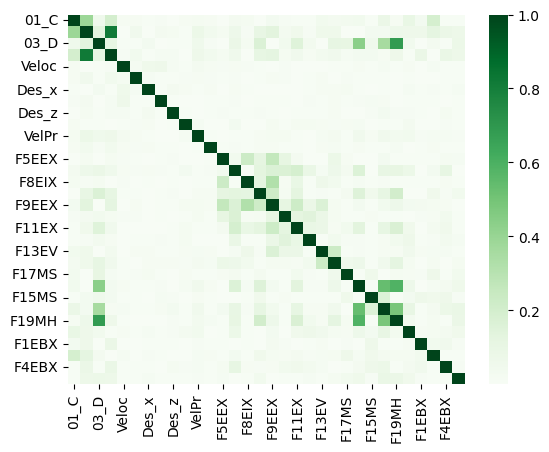

In [17]:
Heat_Map1 = sns.heatmap(corrTabla1, cmap = 'Greens')
Heat_Map1

In [18]:
# 02_A Ansiedad
# Filtrando las correlaciones fuertes
corrTabla1 = abs(df_numerico.corr()['02_A'])
corrTabla1 = corrTabla1[corrTabla1.abs() > 0.20].sort_values(ascending=False).to_frame()
corrTabla1

,02_A
02_A,1.000000
04_M,0.817725
01_C,0.388198


# LINEAL

### Filtro de 02_A vs 04_M

<Axes: xlabel='04_M', ylabel='02_A'>

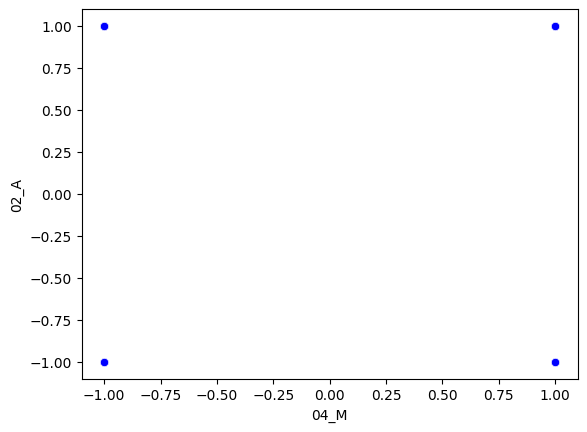

In [19]:
from turtle import color

sns.scatterplot(x ='04_M' , y='02_A', color="blue", data=df_numerico)

In [20]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= df_numerico[["04_M"]]
var_Dep= df_numerico[["02_A"]]

In [21]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [22]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [23]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=var_Dep)

LinearRegression()

In [24]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['04_M'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[-0.8729566]]),
 'rank_': 1,
 'singular_': array([142.69700403]),
 'intercept_': array([-0.12426369])}

In [25]:
#Predecimos los valores de host_response_rate a partir de la variable host_acceptance_rate
y_pred= model.predict(X=df_numerico[['04_M']])
y_pred

array([[0.7486929],
       [0.7486929],
       [0.7486929],
       ...,
       [0.7486929],
       [0.7486929],
       [0.7486929]])

In [26]:
df_numerico.insert(0, 'Predict1', y_pred)
df_numerico

,Predict1,01_C,02_A,03_D,04_M,Veloc,Acele,Des_x,Des_y,Des_z,...,F17MS,F18MX,F15MS,F16MX,F19MH,F20MH,F1EBX,F2EBS,F4EBX,F3EBS
0,0.748693,-1,1,-1,-1,0.4,0.3,0.400000,0.4,0.2,...,0.7,0.600000,0.8,0.700000,0.7,0.600000,0.7,0.7,0.6,0.600000
1,0.748693,-1,1,-1,-1,0.4,0.3,0.400000,0.4,0.2,...,0.7,0.600000,0.8,0.700000,0.7,0.600000,0.7,0.7,0.6,0.600000
2,0.748693,-1,1,-1,-1,0.4,0.3,0.400000,0.4,0.2,...,0.7,0.600000,0.8,0.700000,0.7,0.600000,0.7,0.7,0.6,0.600000
3,0.748693,-1,1,-1,-1,0.4,0.3,0.400000,0.4,0.2,...,0.7,0.600000,0.8,0.700000,0.7,0.600000,0.7,0.7,0.6,0.600000
4,0.748693,-1,1,-1,-1,0.4,0.3,0.400000,0.4,0.2,...,0.7,0.600000,0.8,0.700000,0.7,0.600766,0.7,0.7,0.6,0.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24595,0.748693,1,-1,-1,-1,0.4,0.3,0.534149,0.4,0.2,...,0.7,0.622687,0.8,0.705328,0.7,0.600000,0.7,0.7,0.6,0.593817
24596,0.748693,1,-1,-1,-1,0.4,0.3,0.538774,0.4,0.2,...,0.7,0.629916,0.8,0.702665,0.7,0.600000,0.7,0.7,0.6,0.608083
24597,0.748693,1,-1,-1,-1,0.4,0.3,0.400000,0.4,0.2,...,0.7,0.622235,0.8,0.700000,0.7,0.600000,0.7,0.7,0.6,0.599183
24598,0.748693,1,-1,-1,-1,0.4,0.3,0.400000,0.4,0.2,...,0.7,0.622909,0.8,0.700000,0.7,0.600000,0.7,0.7,0.6,0.597855


<Axes: xlabel='04_M', ylabel='02_A'>

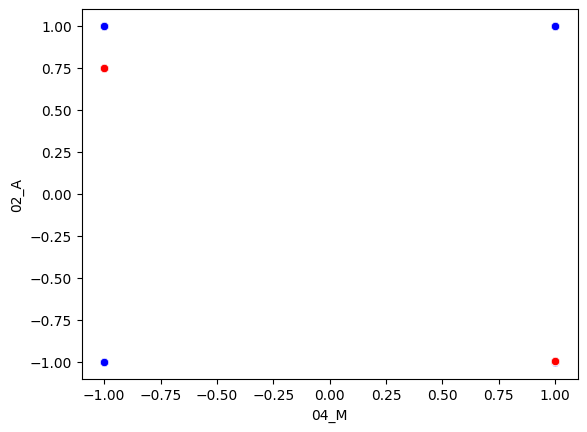

In [27]:
#Visualizamos la gráica comparativa

sns.scatterplot(x='04_M', y='02_A', color='blue', data=df_numerico)
sns.scatterplot(x='04_M', y='Predict1', color='red', data=df_numerico)

In [28]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo (R cuadrada)
coef_Deter=model.score(X=Vars_Indep, y=var_Dep)
coef_Deter
#Más cercano al 0 es malo (no hay relación) y más cercano a 1 es bueno (Perfecto)

0.6686748386267383

In [29]:
#Corroboramos cual es el coeficiente de correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl
##Más cercano al 0 es malo (no hay relación) y más cercano a 1 es bueno (Perfecto)

0.8177254053939734

# MÚLTIPLE


In [30]:
# 02_A Ansiedad
# Filtrando las correlaciones fuertes
corrTabla2 = abs(df_numerico.corr()['02_A'])
corrTabla2 = corrTabla2[corrTabla2.abs() > 0.10].sort_values(ascending=False).to_frame()
corrTabla2

,02_A
02_A,1.000000
04_M,0.817725
Predict1,0.817725
01_C,0.388198
03_D,0.135733
F9EEX,0.133202
F2EBS,0.121164
F7EIS,0.101857


<Axes: >

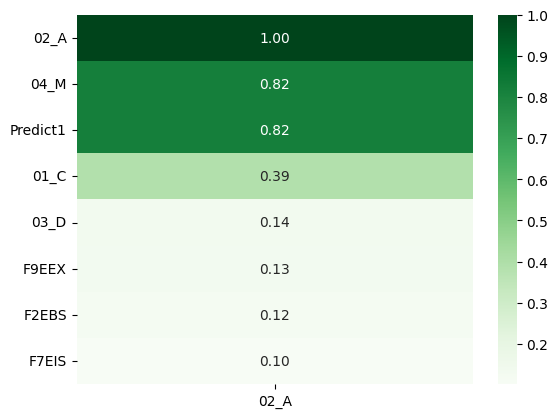

In [31]:
# Gráficamos el mapa de calor de los coeficientes de correlación
Heat_Map2 = sns.heatmap(corrTabla2, cmap = 'Greens', annot = True, fmt = ".2f")
Heat_Map2


<Axes: xlabel='04_M', ylabel='02_A'>

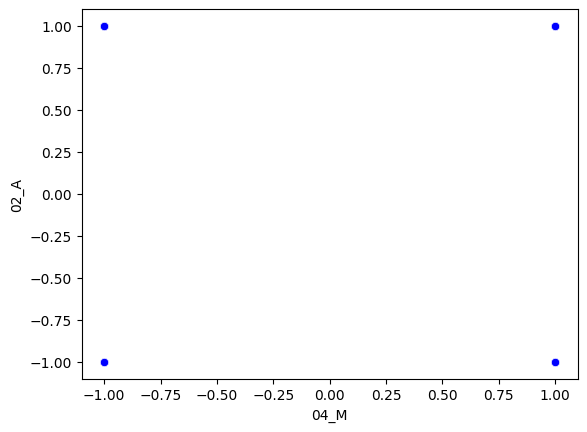

In [32]:
# Imprimimos el scatterplot entre la variable dependiente e independiente
from turtle import color

sns.scatterplot(x = '04_M', y = '02_A', color = 'blue', data = df_numerico) # Independiente, Dependiente, color, df02_A04_M

In [33]:
# Declaramos las variables dependientes e independientes de la regresión lineal
Vars_Indep = df[["04_M","01_C"]] # Independiente = x
Var_Dep = df[["02_A"]] # Dependiente = y

# Se define model con la función de regresión Lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Ajustamos el modelo con las variables declaradas
model.fit(X = Vars_Indep, y = Var_Dep)

# Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['04_M', '01_C'], dtype=object),
 'n_features_in_': 2,
 'coef_': array([[-0.99467099, -0.9622186 ]]),
 'rank_': 2,
 'singular_': array([144.52368377,  87.8491313 ]),
 'intercept_': array([-0.95941853])}

In [34]:
# Predecimos los valores
y_pred = model.predict(X = df[["04_M","01_C"]])
y_pred

array([[ 0.99747105],
       [ 0.99747105],
       [ 0.99747105],
       ...,
       [-0.92696615],
       [-0.92696615],
       [-0.92696615]])

In [35]:
# Insertamos la columna de preddiciones en el df

df_numerico.insert(1, 'Predict_2', y_pred)
df_numerico

,Predict1,Predict_2,01_C,02_A,03_D,04_M,Veloc,Acele,Des_x,Des_y,...,F17MS,F18MX,F15MS,F16MX,F19MH,F20MH,F1EBX,F2EBS,F4EBX,F3EBS
0,0.748693,0.997471,-1,1,-1,-1,0.4,0.3,0.400000,0.4,...,0.7,0.600000,0.8,0.700000,0.7,0.600000,0.7,0.7,0.6,0.600000
1,0.748693,0.997471,-1,1,-1,-1,0.4,0.3,0.400000,0.4,...,0.7,0.600000,0.8,0.700000,0.7,0.600000,0.7,0.7,0.6,0.600000
2,0.748693,0.997471,-1,1,-1,-1,0.4,0.3,0.400000,0.4,...,0.7,0.600000,0.8,0.700000,0.7,0.600000,0.7,0.7,0.6,0.600000
3,0.748693,0.997471,-1,1,-1,-1,0.4,0.3,0.400000,0.4,...,0.7,0.600000,0.8,0.700000,0.7,0.600000,0.7,0.7,0.6,0.600000
4,0.748693,0.997471,-1,1,-1,-1,0.4,0.3,0.400000,0.4,...,0.7,0.600000,0.8,0.700000,0.7,0.600766,0.7,0.7,0.6,0.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24595,0.748693,-0.926966,1,-1,-1,-1,0.4,0.3,0.534149,0.4,...,0.7,0.622687,0.8,0.705328,0.7,0.600000,0.7,0.7,0.6,0.593817
24596,0.748693,-0.926966,1,-1,-1,-1,0.4,0.3,0.538774,0.4,...,0.7,0.629916,0.8,0.702665,0.7,0.600000,0.7,0.7,0.6,0.608083
24597,0.748693,-0.926966,1,-1,-1,-1,0.4,0.3,0.400000,0.4,...,0.7,0.622235,0.8,0.700000,0.7,0.600000,0.7,0.7,0.6,0.599183
24598,0.748693,-0.926966,1,-1,-1,-1,0.4,0.3,0.400000,0.4,...,0.7,0.622909,0.8,0.700000,0.7,0.600000,0.7,0.7,0.6,0.597855


<Axes: xlabel='04_M', ylabel='02_A'>

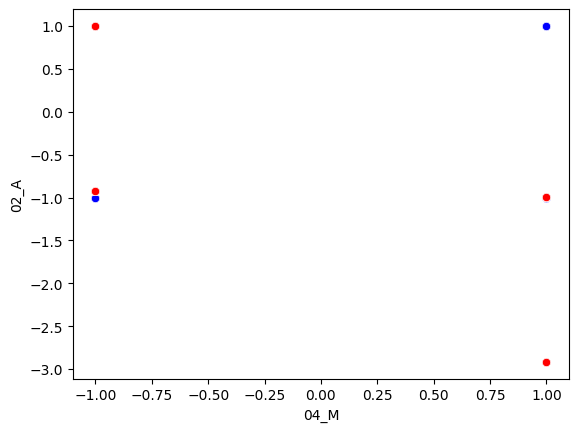

In [36]:
# Gráfica de comparación
sns.scatterplot(x = "04_M", y = '02_A', color = 'blue', data = df_numerico)
sns.scatterplot(x = "04_M", y = 'Predict_2', color = "red", data = df_numerico)

In [37]:
# Coeficiente de determinación de nuestro modelo (R cuadrada)
coef_Deter_1 = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter_1 # Más cercano al 0 es malo (No hay relación) y más cercano al 1 es bueno (Perfecto)


0.984517465756424

In [38]:

# Corroboramos el coeficiente de correlación de nuestro modelo
coef_Correl_1 = np.sqrt(coef_Deter_1)
coef_Correl_1 # Más cercano al 0 es malo (No hay relación) y más cercano al 1 es bueno (Perfecto)

0.9922285350444342

# Regresión no lineal

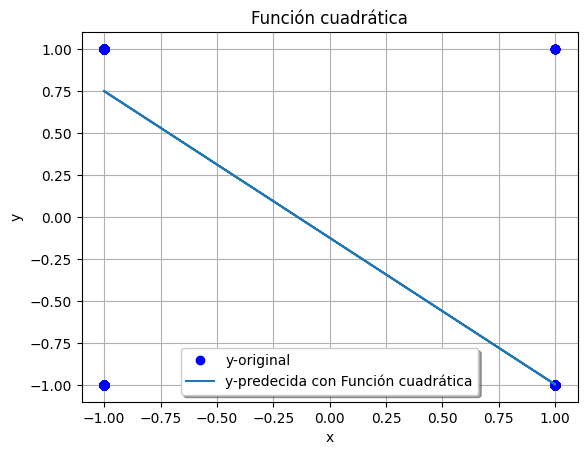

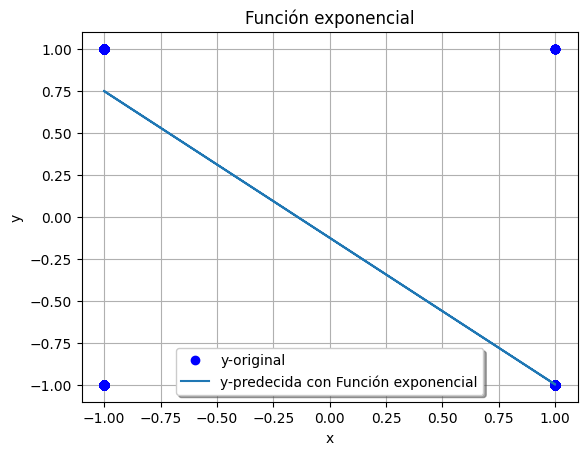

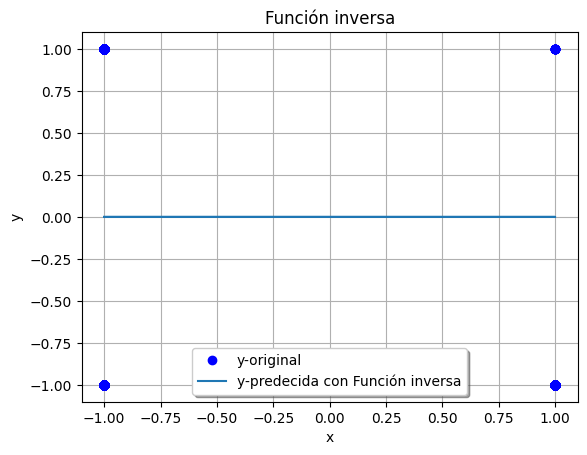

C:\Users\Sebastian\AppData\Local\Temp\ipykernel_1560\2132527503.py:87: RuntimeWarning: invalid value encountered in sqrt
  R = np.sqrt(R2)


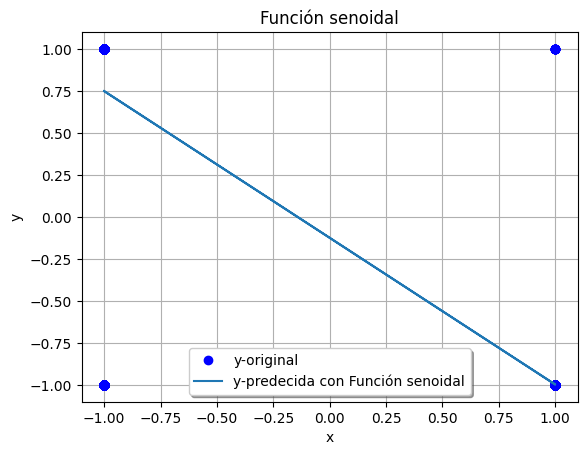

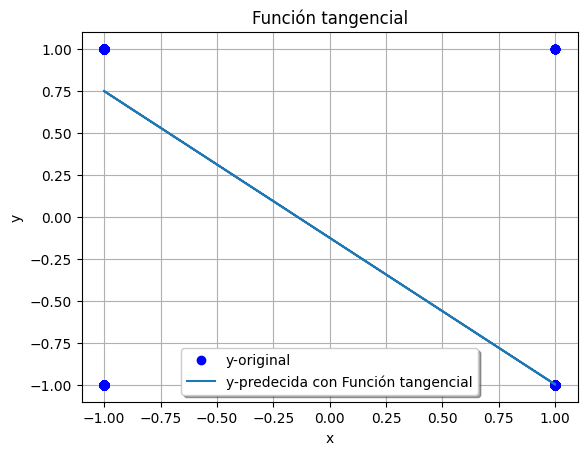

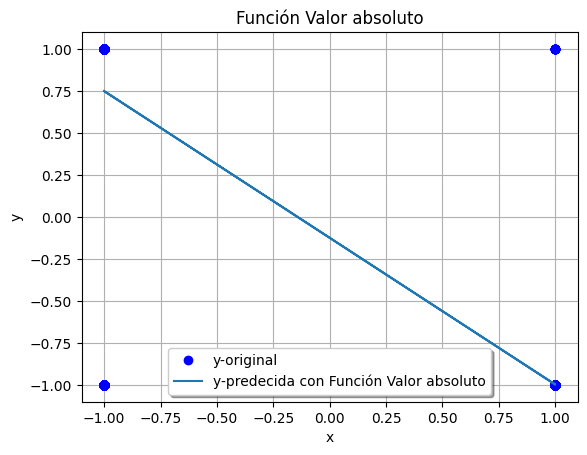

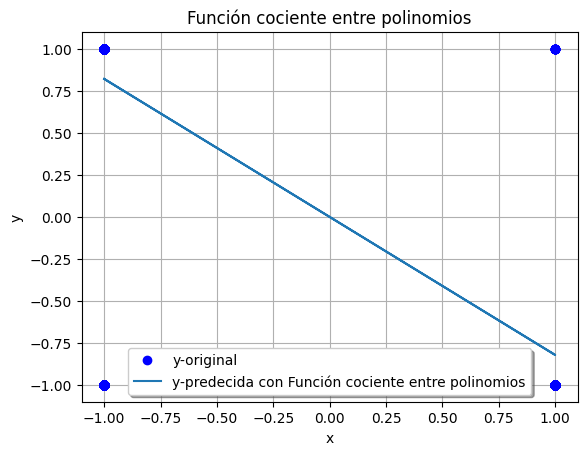

C:\Users\Sebastian\AppData\Roaming\Python\Python312\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Sebastian\AppData\Local\Temp\ipykernel_1560\2132527503.py:67: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros, _ = curve_fit(modelo, x, y)


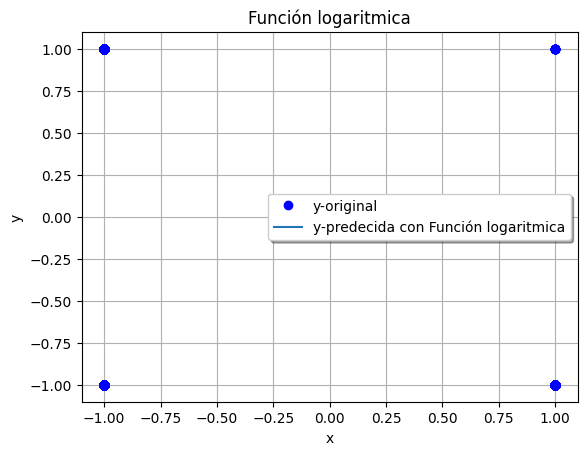

Error al ajustar Función logaritmica: Input contains NaN.


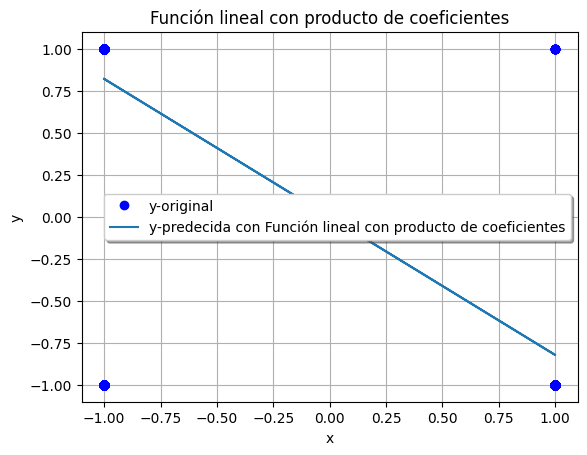

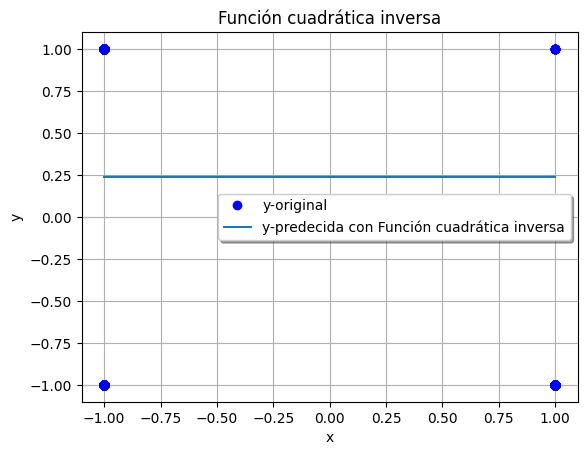

C:\Users\Sebastian\AppData\Local\Temp\ipykernel_1560\2132527503.py:87: RuntimeWarning: invalid value encountered in sqrt
  R = np.sqrt(R2)


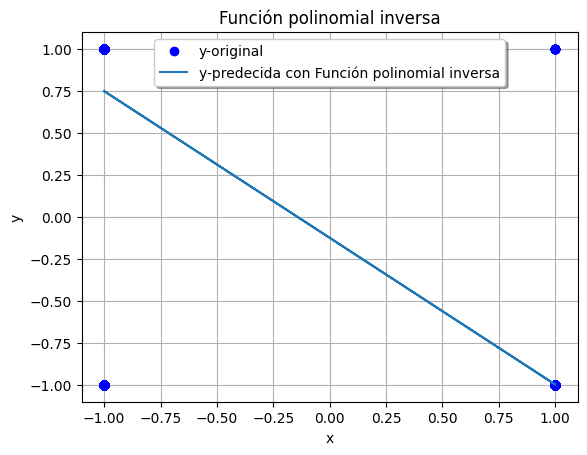


Función cuadrática:
R² = 0.6686748386267383
R = 0.8177254053939734

Función exponencial:
R² = 0.6686748385029009
R = 0.8177254053182529

Función inversa:
R² = -0.060071320005010476
R = nan

Función senoidal:
R² = 0.6686748386267372
R = 0.8177254053939728

Función tangencial:
R² = 0.668674838626738
R = 0.8177254053939733

Función Valor absoluto:
R² = 0.6686748386267383
R = 0.8177254053939734

Función cociente entre polinomios:
R² = 0.6551254969133165
R = 0.8093982313504994

Función lineal con producto de coeficientes:
R² = 0.6551254969141127
R = 0.8093982313509912

Función cuadrática inversa:
R² = -4.440892098500626e-16
R = nan

Función polinomial inversa:
R² = 0.6686748384527179
R = 0.8177254052875683


In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

# Definimos todas las funciones
def func_cuadratica(x, a, b, c):
    return a * x**2 + b * x + c

def func_exponencial(x, a, b, c):
    return a * np.exp(-b * x) + c

def func_inversa(x, a):
    return 1 / a * x

def func_senoidal(x, a, b):
    return a * np.sin(x) + b

def func_tangencial(x, a, b):
    return a * np.tan(x) + b

def func_abs(x, a, b, c):
    return a * np.abs(x) + b * x + c

def func_cociente_polinomios(x, a, b, c):
    return (a * x**2 + b) / (c * x)

def func_logaritmica(x, a, b):
    return a * np.log(x) + b

def func_producto_coef(x, a, b, c):
    return a * x + b * x + c * x

def func_cuadratica_inversa(x, a):
    return 1 / a * x**2

def func_polinomial_inversa(x, a, b, c):
    return a / b * x**2 + c * x

# Diccionario para mapear los nombres de las funciones con las definiciones
modelos = {
    "Función cuadrática": func_cuadratica,
    "Función exponencial": func_exponencial,
    "Función inversa": func_inversa,
    "Función senoidal": func_senoidal,
    "Función tangencial": func_tangencial,
    "Función Valor absoluto": func_abs,
    "Función cociente entre polinomios": func_cociente_polinomios,
    "Función logaritmica": func_logaritmica,
    "Función lineal con producto de coeficientes": func_producto_coef,
    "Función cuadrática inversa": func_cuadratica_inversa,
    "Función polinomial inversa": func_polinomial_inversa
}

# Declaramos las variables dependientes e independientes
Vars_Indep = df[['04_M']]
Var_Dep = df['02_A']
x = Vars_Indep.squeeze()  # Convertimos a array 1D
y = Var_Dep

# Ciclo para ajustar cada modelo
resultados = {}

for nombre, modelo in modelos.items():
    try:
        # Ajustamos los parámetros de cada modelo usando curve_fit
        parametros, _ = curve_fit(modelo, x, y)

        # Predicciones
        y_pred = modelo(x, *parametros)

        # Graficar los resultados
        plt.figure()
        plt.plot(x, y, 'bo', label='y-original')
        plt.plot(x, y_pred, label=f'y-predecida con {nombre}')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title(nombre)
        plt.legend(loc='best', fancybox=True, shadow=True)
        plt.grid(True)
        plt.show()

        # Calculamos el coeficiente de determinación (R²)
        R2 = r2_score(y, y_pred)

        # Calculamos el coeficiente de correlación (R)
        R = np.sqrt(R2)

        # Guardar los resultados en un diccionario
        resultados[nombre] = {'R²': R2, 'R': R}

    except Exception as e:
        print(f"Error al ajustar {nombre}: {e}")

# Mostrar los resultados de cada modelo
for modelo, resultado in resultados.items():
    print(f"\n{modelo}:")
    print(f"R² = {resultado['R²']}")
    print(f"R = {resultado['R']}")

In [40]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df[['04_M']]
Var_Dep= df['02_A']

In [41]:
#Redefinimos las variables
x= Vars_Indep
y= Var_Dep

In [42]:
def func1 (x, a, b, c):
  return a*x**2 + b*x + c

In [43]:
#Ajustamos los parámetros de la función curve_fit
parametros1, covs= curve_fit(func1, df['04_M'], df['02_A'])

In [44]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros1

array([ 122.41235529,   -0.8729566 , -122.53661899])

In [45]:
# Predicciones
y_pred1 = func1(x, *parametros1)

In [46]:
#Calculamos las predicciones y reestructuramos el vector de predicciones
y_pred1

,04_M
0,0.748693
1,0.748693
2,0.748693
3,0.748693
4,0.748693
...,...
24595,0.748693
24596,0.748693
24597,0.748693
24598,0.748693


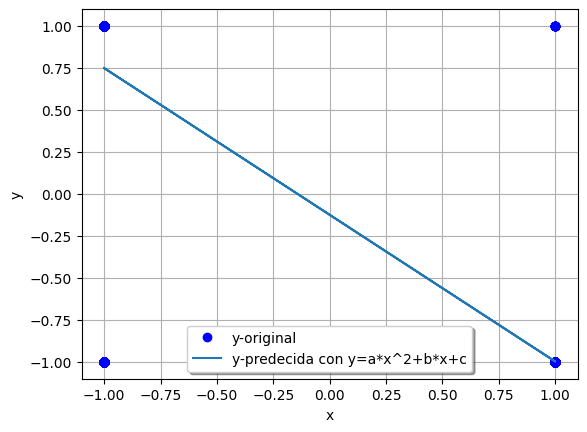

In [47]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, y_pred1, label="y-predecida con y=a*x^2+b*x+c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [48]:
#Calculamos el coeficiente de determinación del modelo
R2_Modelo1 = r2_score(y, y_pred1)
R2_Modelo1

0.6686748386267383

In [49]:
#Calculamos el coeficiente de correlación del modelo
R = np.sqrt(R2_Modelo1)
R

0.8177254053939734

# Regresión logistica

In [50]:
#Declaramos las variables dependientes e independientes para la regresión Logística
Vars_Indep= df_numerico[['04_M']]
Var_Dep= df_numerico['02_A']

In [51]:
#Redefinimos las variables
X= Vars_Indep
y= Var_Dep

In [52]:
#Dividimos el conjunto de datos en la parte de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =None)

In [53]:
#Se escalan todos los datos
escalar = StandardScaler()

In [54]:
#Definimos el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()

In [55]:
#Entrenamos el modelo
algoritmo.fit(X_train, y_train)

LogisticRegression()

In [56]:
#Realizamos una predicción
y_pred = algoritmo.predict(X_test)
y_pred

array([ 1,  1, -1, ...,  1, -1,  1], dtype=int64)

In [57]:

#Verifico la matriz de Confusión
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[2153  683]
 [   2 4542]]


In [58]:

#Calculo la precisión del modelo
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred, average="binary", pos_label=1)
print('Precisión del modelo:')
print(precision)

Precisión del modelo:
0.8692822966507177


In [59]:
#Calculo la exactitud del modelo
from sklearn.metrics import accuracy_score

exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud)

Exactitud del modelo:
0.9071815718157181


In [60]:
#Calculo la sensibilidad del modelo
from sklearn.metrics import recall_score

sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label=1)
print('Sensibilidad del modelo:')
print(sensibilidad)

Sensibilidad del modelo:
0.9995598591549296


In [61]:
dfansiedad.isnull().sum().sum()

0

In [62]:
dfansiedad.to_csv('Ansiedad_limpio.csv', index=False)